<a href="https://colab.research.google.com/github/Amin1771/ML-notebooks/blob/main/house_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dataset

In [7]:
from google.colab import files


In [8]:
uploaded = files.upload()


Saving house.csv to house.csv


In [71]:
import pandas as pd

# Load the dataset
file_name = 'house.csv'  # Replace with the actual filename
df = pd.read_csv(file_name)

# Display the first few rows of the dataset
df.head()


,Date,AZ-Phoenix,CA-Los Angeles,CA-San Diego,CA-San Francisco,CO-Denver,DC-Washington,FL-Miami,FL-Tampa,GA-Atlanta,...,NC-Charlotte,NV-Las Vegas,NY-New York,OH-Cleveland,OR-Portland,TX-Dallas,WA-Seattle,Composite-10,Composite-20,National-US
0,2011-07-01,95.182,101.438,133.313,295.963,127.349,131.928,131.917,167.067,96.591,...,114.486,99.200,331.327,152.161,111.769,138.301,123.560,153.677,123.542,153.120
1,2011-06-01,95.689,101.569,133.203,295.855,127.403,132.548,131.254,166.428,95.974,...,114.371,98.769,330.440,152.327,112.101,136.713,124.152,153.730,122.894,154.011
2,2011-05-01,96.061,101.329,134.295,296.040,127.288,133.191,130.894,165.759,95.344,...,113.809,98.929,328.896,151.179,111.438,135.148,123.779,153.928,122.424,154.770
3,2011-04-01,97.305,101.006,134.651,296.715,127.979,133.510,130.099,165.413,94.784,...,113.668,99.515,327.595,149.238,110.950,133.303,123.576,154.224,122.107,155.550
4,2011-03-01,98.210,100.360,135.619,296.818,129.025,133.695,127.520,164.418,94.217,...,115.675,100.123,326.275,151.378,110.222,131.615,123.276,154.026,122.086,155.825


# handling outliers


Outliers per feature:
AZ-Phoenix: 44 outliers
CA-Los Angeles: 0 outliers
CA-San Diego: 0 outliers
CA-San Francisco: 23 outliers
CO-Denver: 17 outliers
DC-Washington: 0 outliers
FL-Miami: 0 outliers
FL-Tampa: 0 outliers
GA-Atlanta: 13 outliers
IL-Chicago: 0 outliers
MA-Boston: 0 outliers
MI-Detroit: 0 outliers
MN-Minneapolis: 23 outliers
NC-Charlotte: 0 outliers
NV-Las Vegas: 0 outliers
NY-New York: 16 outliers
OH-Cleveland: 0 outliers
OR-Portland: 0 outliers
TX-Dallas: 29 outliers
WA-Seattle: 0 outliers
Composite-10: 0 outliers
Composite-20: 0 outliers
National-US: 0 outliers


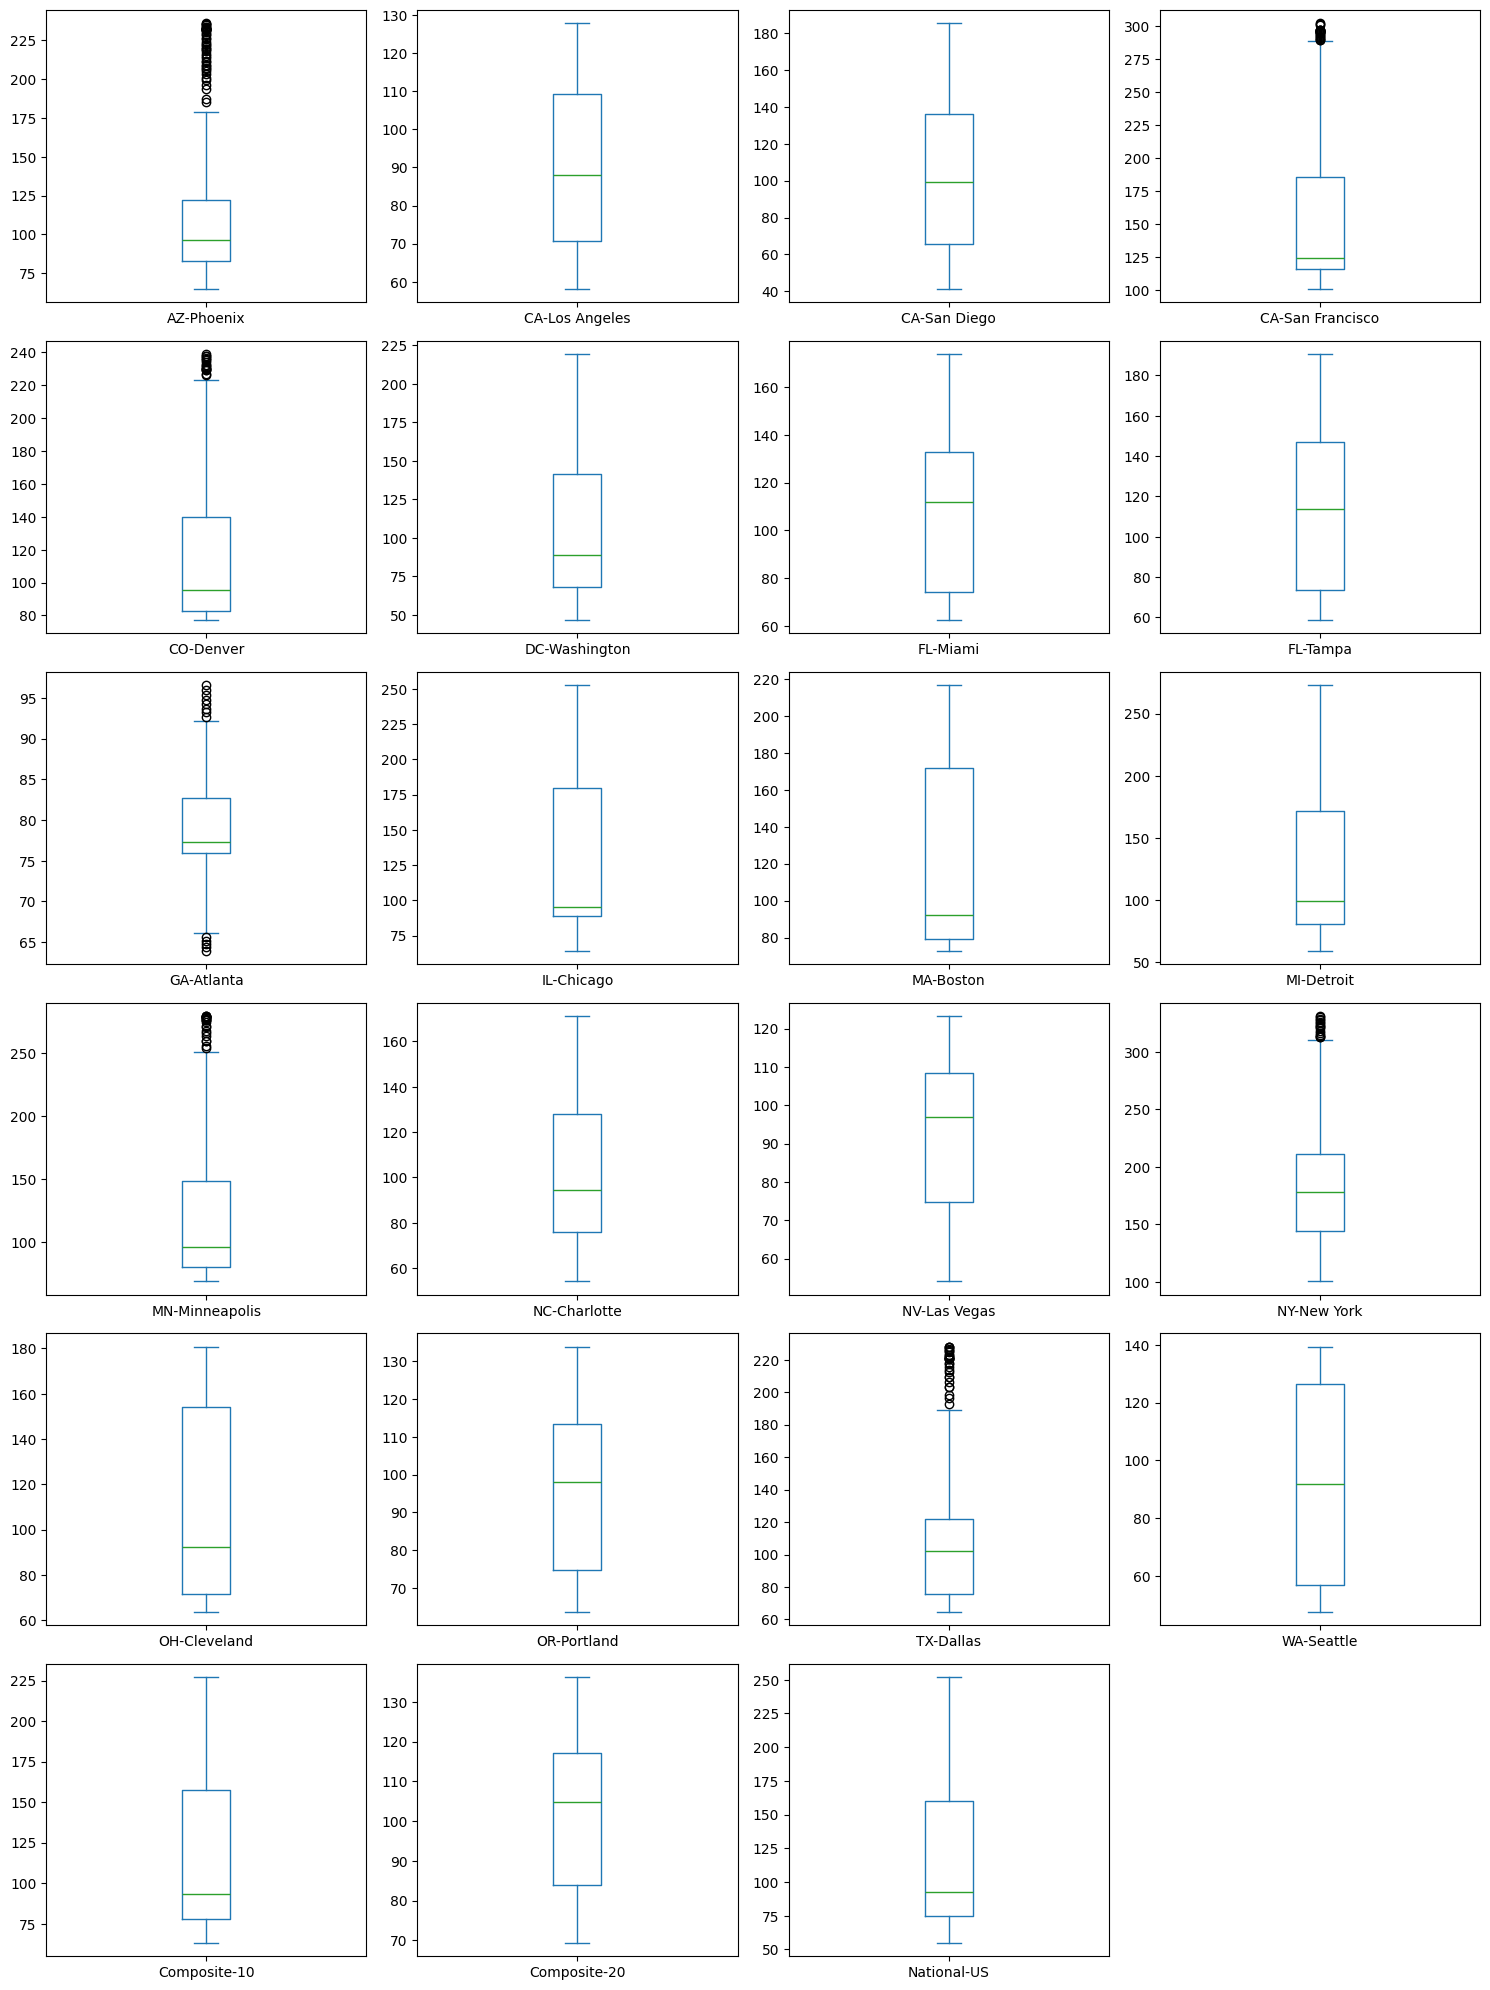

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume df is your DataFrame
# Example: df = pd.read_csv('your_data.csv', parse_dates=['Date'])

# Calculate IQR and determine outliers
def find_outliers_iqr(df):
    outliers = {}
    # Loop through each feature in the DataFrame
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(df[column]):
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            # Find outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_points = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
            outliers[column] = outlier_points

    return outliers

outliers = find_outliers_iqr(df)
print("Outliers per feature:")
for feature, outlier_values in outliers.items():
    print(f"{feature}: {len(outlier_values)} outliers")

# Plot box plots for each feature
df.set_index("Date").plot(kind='box', subplots=True, layout=(-1, 4), figsize=(15, 20), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


# Interpreting Outliers in House Prices:
**Significance of Outliers:**

Outliers can indicate unusually high or low prices compared to the typical range for a given area. When dealing with house prices, these typically represent properties priced much higher (or lower) than the average in that location.
**High Price Locations:**

**CA-San Francisco and NY-New York:** Historically, these markets are known for high property values due to demand outstripping supply, driven by factors such as limited space, economic activity, and desirability.
**TX-Dallas**: The presence of outliers here might reflect certain high-end real estate developments or rapid price increases in specific neighborhoods.
**CO-Denver and MN-Minneapolis**: While not traditionally as high-priced as San Francisco or New York, these areas might be experiencing market changes, leading to several high-value properties.
Markets with No Detected Outliers:

Some major cities like CA-Los Angeles, FL-Miami, DC-Washington, and WA-Seattle did not show outliers in your analysis. This might suggest stable markets with consistent pricing, yet it’s important to consider that localized high prices in these areas may not be statistically significant outliers.


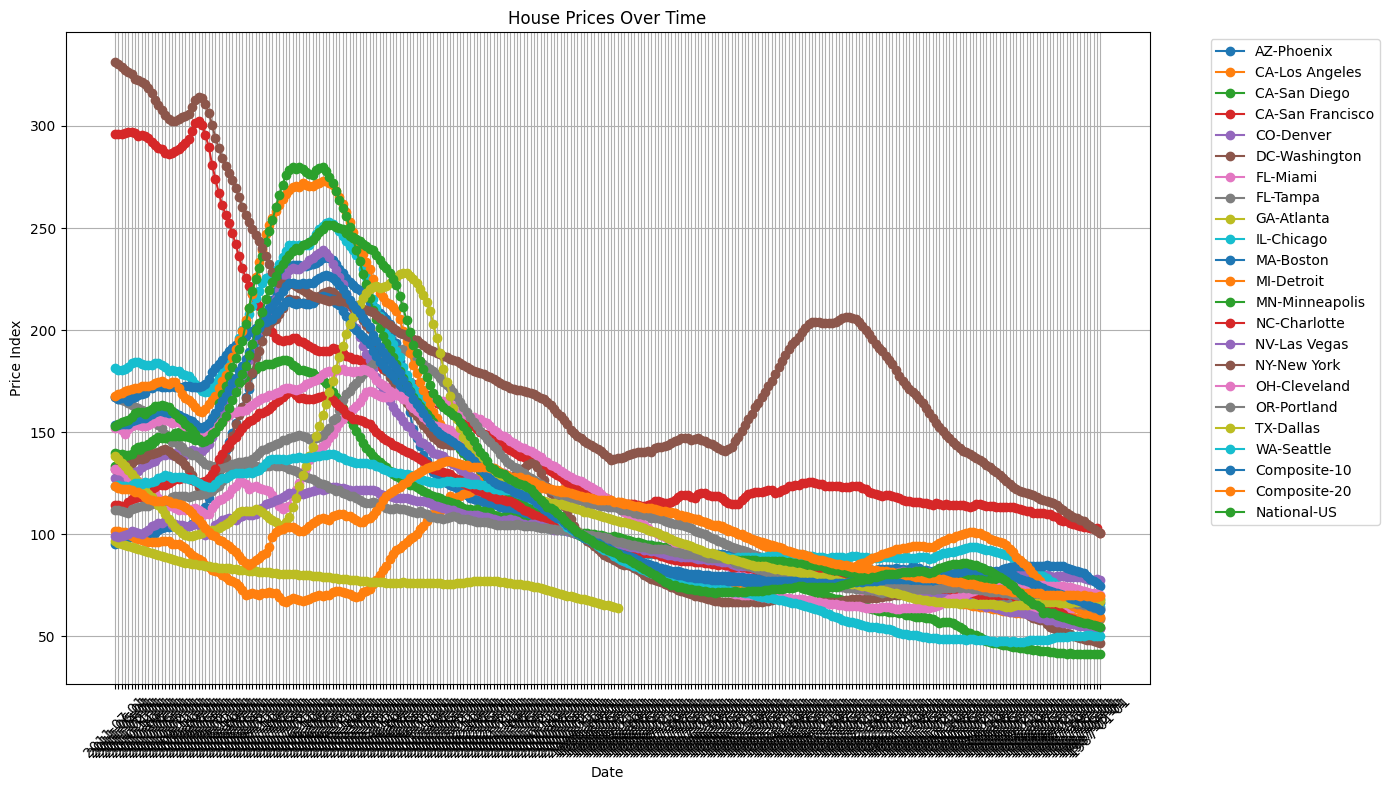

In [73]:
# Plot line graph
plt.figure(figsize=(14, 8))
for column in df.columns[1:]:  # Skip 'Date'
    plt.plot(df['Date'], df[column], marker='o', label=column)

plt.title('House Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price Index')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# missing data values

In [74]:
import pandas as pd

# Assuming your dataframe is named df
# Example of loading data: df = pd.read_csv('your_data.csv')

# Check for missing values per column
missing_data = df.isnull().sum()

# Display the result
print("Missing values per feature:")
print(missing_data)


Missing values per feature:
Date                  0
AZ-Phoenix            0
CA-Los Angeles        0
CA-San Diego          0
CA-San Francisco      0
CO-Denver             0
DC-Washington         0
FL-Miami              0
FL-Tampa              0
GA-Atlanta          144
IL-Chicago            0
MA-Boston             0
MI-Detroit            0
MN-Minneapolis        0
NC-Charlotte          0
NV-Las Vegas          0
NY-New York           0
OH-Cleveland          0
OR-Portland           0
TX-Dallas             0
WA-Seattle            0
Composite-10          0
Composite-20          0
National-US           0
dtype: int64


# Data imputation

In [14]:
pip install fancyimpute


  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 4.0 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=6cba09a48f426ff6700890d7d340747c204da6af12d7a556fefb91da7c116cfc
  Stored in directory: /root/.cache/pip/wheels/1a/f3/a1/f7f10b5ae2c2459398762a3fcf4ac18c325311c7e3163d5a15
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=6b750ad385340e52019359ee5f353c19dd11acd08ea7052e7a440b34027910ca
  Stored in directory: /root/.cache/pip/wheels/ea/e8/e0/79872972161e54486517ae507f94b2c7cea27fb7ef793bd415
Successfully built fancyimpute knnimpute


In [75]:
import pandas as pd
from fancyimpute import IterativeImputer

# Assuming `df` is your DataFrame and has a column 'GA-Atlanta'
# Ensure the 'GA-Atlanta' column is numeric or can be converted to numeric

# Check if the column 'GA-Atlanta' exists in the DataFrame
if 'GA-Atlanta' in df.columns:
    # Initialize the MICE imputer (fancyimpute uses IterativeImputer)
    mice_imputer = IterativeImputer(max_iter=10, random_state=0)

    # Perform imputation on the dataframe (you can specify the subset of columns, if needed)
    df[['GA-Atlanta']] = mice_imputer.fit_transform(df[['GA-Atlanta']])

    # The missing data in the 'GA-Atlanta' column should now be imputed
    print("Data imputed successfully using MICE.")
else:
    print("Error: The column 'GA-Atlanta' does not exist in the DataFrame.")


Data imputed successfully using MICE.


In [28]:
import pandas as pd

# Assuming your dataframe is named df
# Example of loading data: df = pd.read_csv('your_data.csv')

# Check for missing values per column
missing_data = df.isnull().sum()

# Display the result
print("Missing values per feature:")
print(missing_data)


Missing values per feature:
Date                0
AZ-Phoenix          0
CA-Los Angeles      0
CA-San Diego        0
CA-San Francisco    0
CO-Denver           0
DC-Washington       0
FL-Miami            0
FL-Tampa            0
GA-Atlanta          0
IL-Chicago          0
MA-Boston           0
MI-Detroit          0
MN-Minneapolis      0
NC-Charlotte        0
NV-Las Vegas        0
NY-New York         0
OH-Cleveland        0
OR-Portland         0
TX-Dallas           0
WA-Seattle          0
Composite-10        0
Composite-20        0
National-US         0
dtype: int64


# EDA

First five rows of the dataset:
         Date  AZ-Phoenix  CA-Los Angeles  CA-San Diego  CA-San Francisco  \
0  2011-07-01      95.182         101.438       133.313           295.963   
1  2011-06-01      95.689         101.569       133.203           295.855   
2  2011-05-01      96.061         101.329       134.295           296.040   
3  2011-04-01      97.305         101.006       134.651           296.715   
4  2011-03-01      98.210         100.360       135.619           296.818   

   CO-Denver  DC-Washington  FL-Miami  FL-Tampa  GA-Atlanta  ...  \
0    127.349        131.928   131.917   167.067      96.591  ...   
1    127.403        132.548   131.254   166.428      95.974  ...   
2    127.288        133.191   130.894   165.759      95.344  ...   
3    127.979        133.510   130.099   165.413      94.784  ...   
4    129.025        133.695   127.520   164.418      94.217  ...   

   NC-Charlotte  NV-Las Vegas  NY-New York  OH-Cleveland  OR-Portland  \
0       114.486        

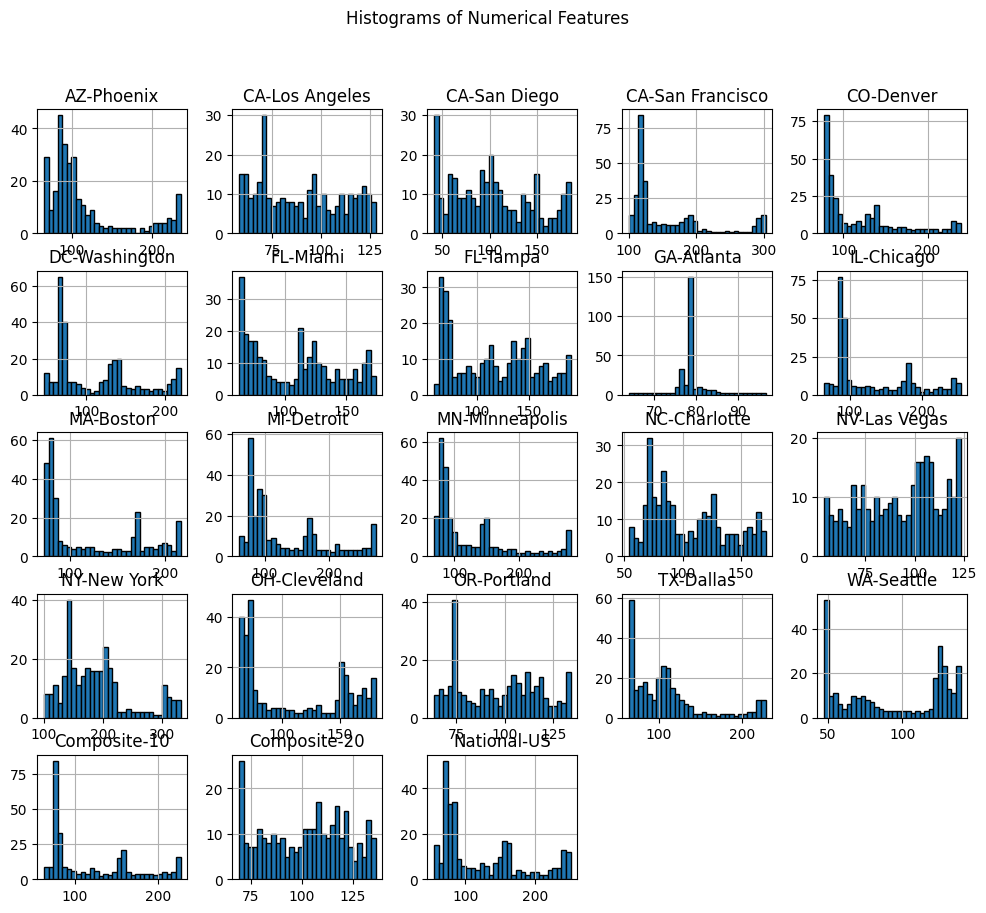

<ipython-input-17-9d5ad280549e>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


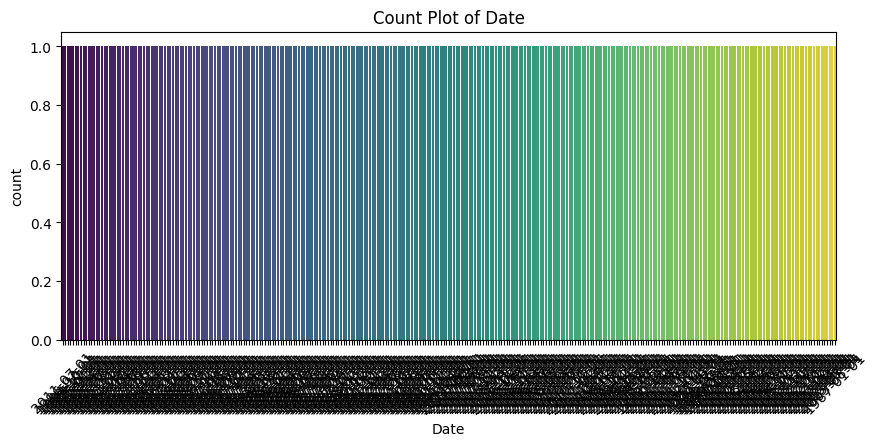

<ipython-input-17-9d5ad280549e>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')
<ipython-input-17-9d5ad280549e>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')
<ipython-input-17-9d5ad280549e>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')
<ipython-input-17-9d5ad280549e>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same e

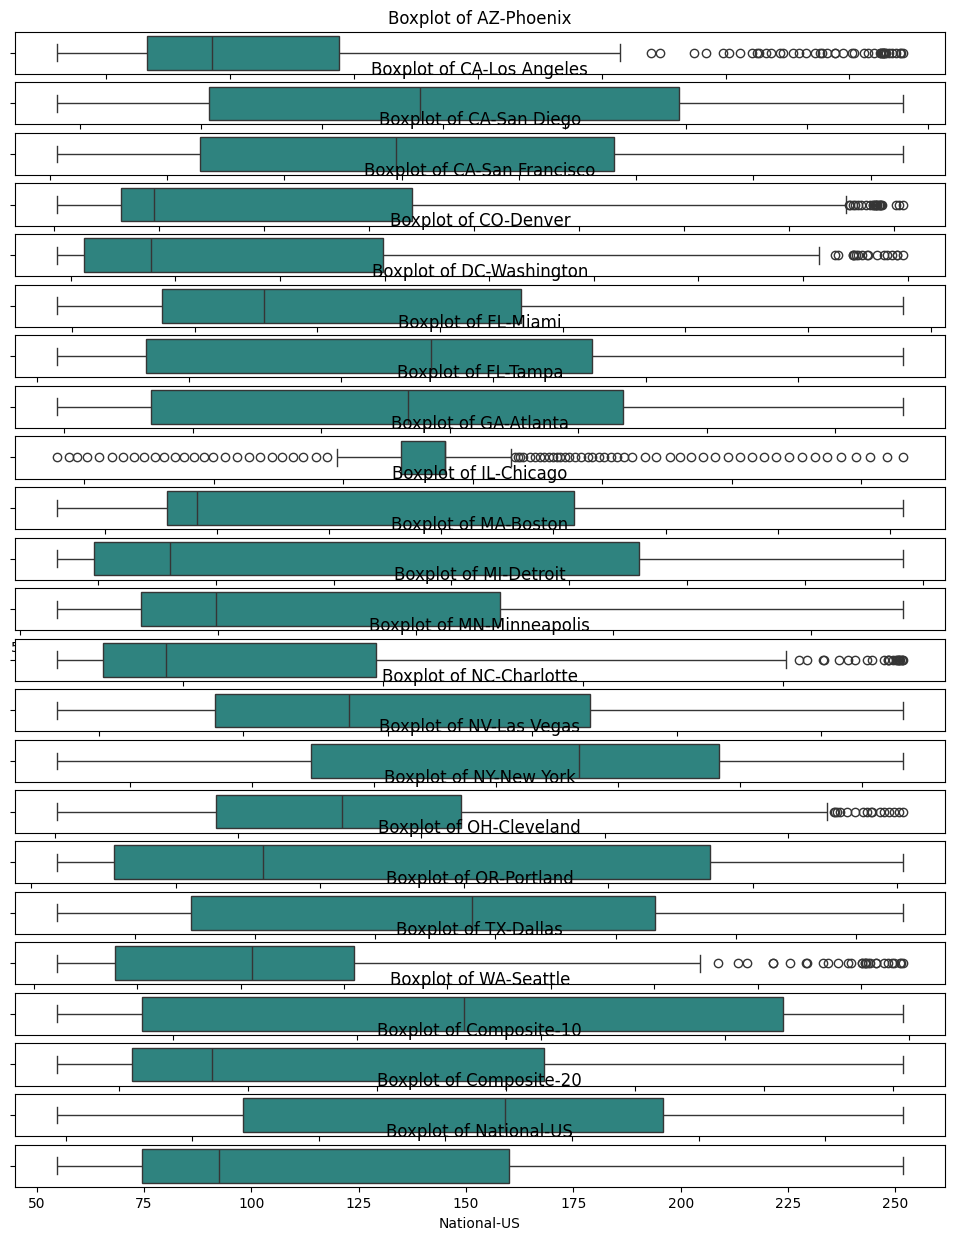

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv('your_data.csv')

# Display the first few rows of the DataFrame
print("First five rows of the dataset:")
print(df.head())

# Get a summary of the dataset
print("\nSummary statistics:")
print(df.describe())


# Distribution of numerical features
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(12, 10), bins=30, edgecolor='black')
plt.suptitle("Histograms of Numerical Features")
plt.show()

# Distribution of categorical features (assuming 'category' type exists)
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

# Box plots for outliers
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 15))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.boxplot(x=df[col], palette='viridis')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [77]:
df.set_index('Date', inplace=True)


KeyError: "None of ['Date'] are in the columns"

In [78]:
df.index = pd.to_datetime(df.index)

In [79]:
df = df.sort_index()


For time series analysis

In [1]:
pip install pandas numpy statsmodels

Root Mean Squared Error: 42.74


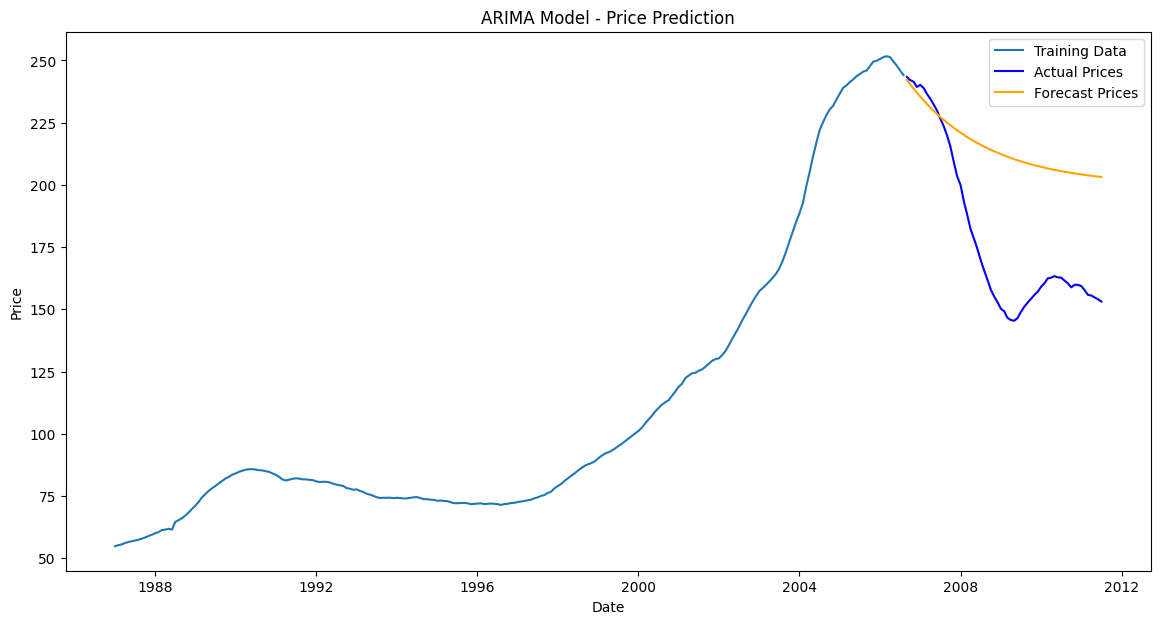

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

# Suppress warnings for better readability
warnings.filterwarnings('ignore')

# Example DataFrame setup (if your DataFrame is already set up, skip this part)
# Assuming 'df' is your DataFrame with 'Date' as index and a column 'price'.
# df = pd.read_csv('your_data.csv', index_col='Date', parse_dates=True)

# Fit the ARIMA model
# Define (p,d,q) orders; these are just examples, you might need to tune these params
order = (5, 1, 0)

# Split data into train and test sets
train_size = int(len(df) * 0.8)
train, test = df['National-US'][:train_size], df['National-US'][train_size:]

# Fit model
model = ARIMA(train, order=order)
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Root Mean Squared Error: {rmse:.2f}')

# Plot actual vs predicted
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Prices', color='blue')
plt.plot(test.index, forecast, label='Forecast Prices', color='orange')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('ARIMA Model - Price Prediction')
plt.legend()
plt.show()

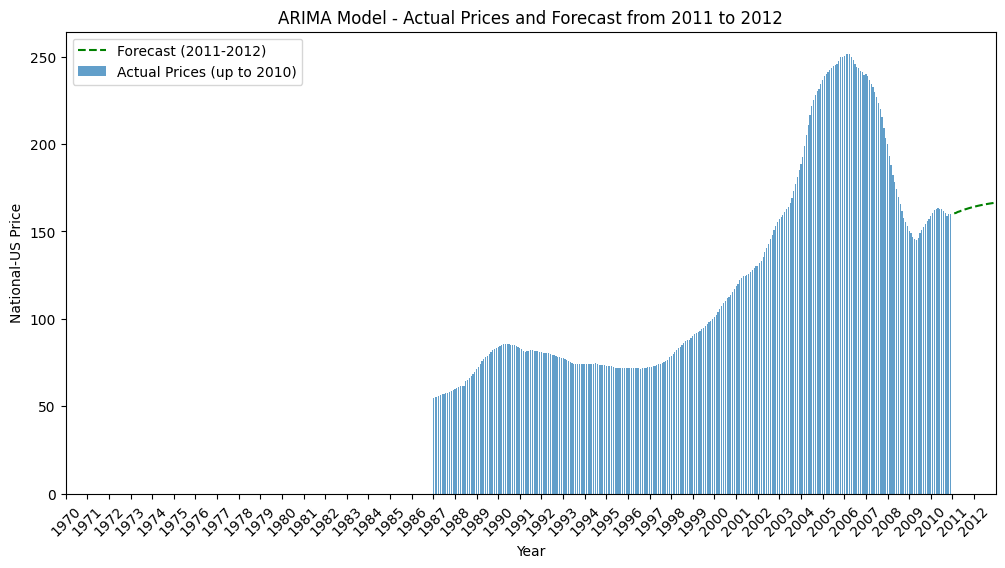

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your DataFrame and the relevant column is 'National-US'
# Ensure the index is a DatetimeIndex
df.index = pd.to_datetime(df.index)

# Sort the index to handle any potential slicing issues
df = df.sort_index()

# Prepare the target variable
y = df['National-US']

# Define the cut-off for training and actual data visualization
train_end = pd.Timestamp('2010-12-31')
train = y.loc[:train_end]  # These are actual data points up to 2010

# Forecast horizon from 2011 to 2015
forecast_start_date = pd.Timestamp('2011-01-01')
forecast_end_date = pd.Timestamp('2012-12-31')
forecast_steps = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='M').shape[0]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust the order if necessary
model_fit = model.fit()

# Forecasting from 2011 to 2015
predictions = model_fit.forecast(steps=forecast_steps)

# Generate forecast index
forecast_index = pd.date_range(start=forecast_start_date, periods=forecast_steps, freq='M')

# Plot
plt.figure(figsize=(12, 6))

# Bar plot for the real prices up to 2011
plt.bar(train.index, train, width=20, label='Actual Prices (up to 2010)', alpha=0.7)

# Line plot for the forecast from 2011 to 2015
plt.plot(forecast_index, predictions, color='green', linestyle='--', label='Forecast (2011-2012)')

# Format the X-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.xlabel('Year')
plt.ylabel('National-US Price')
plt.title('ARIMA Model - Actual Prices and Forecast from 2011 to 2012')
plt.legend()
plt.xlim(pd.Timestamp('1970-01-01'), pd.Timestamp('2012-12-31'))

plt.show()


Predicted Prices for 2012:
January 2012: 164.39
February 2012: 164.63
March 2012: 164.87
April 2012: 165.09
May 2012: 165.30
June 2012: 165.49
July 2012: 165.68
August 2012: 165.86
September 2012: 166.03
October 2012: 166.19
November 2012: 166.35
December 2012: 166.49


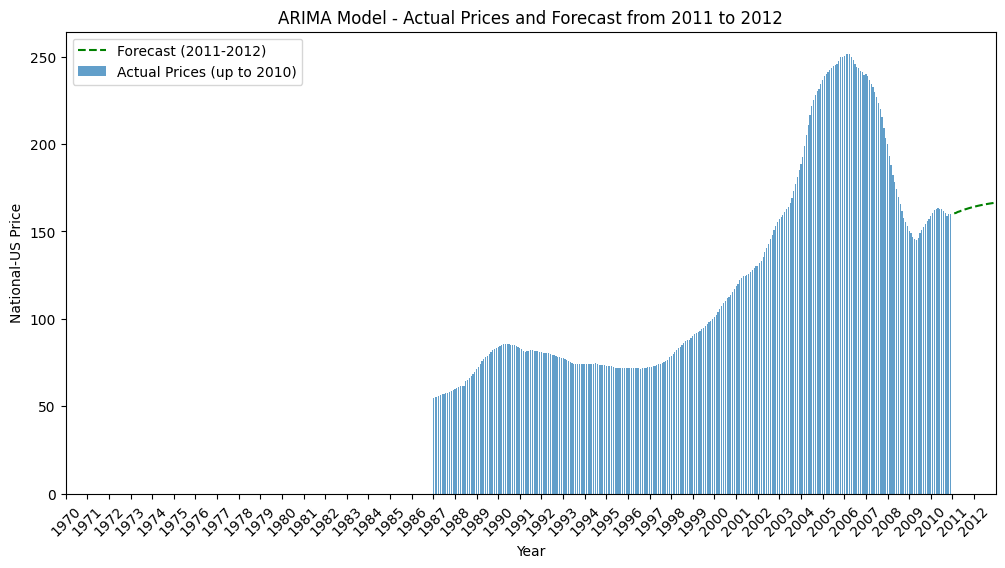

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.arima.model import ARIMA

# Assuming 'df' is your DataFrame and the relevant column is 'National-US'
# Ensure the index is a DatetimeIndex
df.index = pd.to_datetime(df.index)

# Sort the index to handle any potential slicing issues
df = df.sort_index()

# Prepare the target variable
y = df['National-US']

# Define the cut-off for training and actual data visualization
train_end = pd.Timestamp('2010-12-31')
train = y.loc[:train_end]  # These are actual data points up to 2010

# Forecast horizon from 2011 to 2012
forecast_start_date = pd.Timestamp('2011-01-01')
forecast_end_date = pd.Timestamp('2012-12-31')
forecast_steps = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='M').shape[0]

# Fit the ARIMA model
model = ARIMA(train, order=(5, 1, 0))  # Adjust the order if necessary
model_fit = model.fit()

# Forecasting from 2011 to 2012
predictions = model_fit.forecast(steps=forecast_steps)

# Generate forecast index (monthly from 2011 to 2012)
forecast_index = pd.date_range(start=forecast_start_date, periods=forecast_steps, freq='M')

# Extract the prediction for 2012 (this will be the 24th element in predictions if forecasting for two years)
prediction_2012 = predictions[forecast_index.year == 2012]

# Print the forecasted prices for 2012
print("Predicted Prices for 2012:")
for month, price in zip(forecast_index[forecast_index.year == 2012], prediction_2012):
    print(f"{month.strftime('%B %Y')}: {price:.2f}")

# Plot
plt.figure(figsize=(12, 6))

# Bar plot for the real prices up to 2010
plt.bar(train.index, train, width=20, label='Actual Prices (up to 2010)', alpha=0.7)

# Line plot for the forecast from 2011 to 2012
plt.plot(forecast_index, predictions, color='green', linestyle='--', label='Forecast (2011-2012)')

# Format the X-axis
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

plt.xlabel('Year')
plt.ylabel('National-US Price')
plt.title('ARIMA Model - Actual Prices and Forecast from 2011 to 2012')
plt.legend()
plt.xlim(pd.Timestamp('1970-01-01'), pd.Timestamp('2012-12-31'))

plt.show()


In 2012, the U.S. housing market showed signs of recovery after the downturn caused by the financial crisis. Here are some key figures:

National Median Home Price: The approximate median home price in the U.S. was about $177,200.
Annual Increase: Home prices rose by around 6-8% over the course of 2012, marking one of the first significant increases since the housing crash.
These numbers reflect a year where the market began to stabilize, with improvements driven by low interest rates and increased investor activity.